<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Hands-on%20ML/chapter11/Batch_Normalisation%2C_Activation_Functions%2C_Weight_Initialization_and_Dropouts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [4]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [5]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2657 - accuracy: 0.9189 - val_loss: 0.2310 - val_accuracy: 0.9557
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1309 - accuracy: 0.9592 - val_loss: 0.2147 - val_accuracy: 0.9646
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0996 - accuracy: 0.9701 - val_loss: 0.2317 - val_accuracy: 0.9675
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0814 - accuracy: 0.9739 - val_loss: 0.3519 - val_accuracy: 0.9719
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.3694 - val_accuracy: 0.9695
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0595 - accuracy: 0.9812 - val_loss: 0.2391 - val_accuracy: 0.9722
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0547 - accuracy: 0.9828 - val_loss: 0.3013 - val_accuracy:

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6123 - accuracy: 0.9746


[0.6122540235519409, 0.9746000170707703]

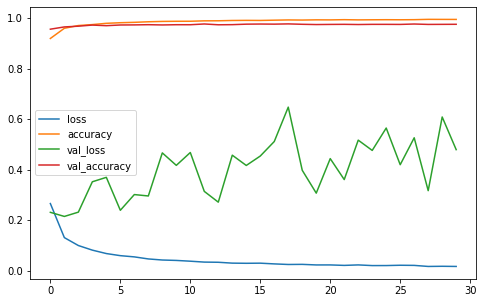

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(128, kernel_initializer='he_normal', use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100352    
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16384     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)              

In [9]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hisotry = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3007 - accuracy: 0.9091 - val_loss: 0.2573 - val_accuracy: 0.9483
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1677 - accuracy: 0.9495 - val_loss: 0.2045 - val_accuracy: 0.9597
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1290 - accuracy: 0.9601 - val_loss: 0.2101 - val_accuracy: 0.9625
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1080 - accuracy: 0.9668 - val_loss: 0.2152 - val_accuracy: 0.9629
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0916 - accuracy: 0.9716 - val_loss: 0.2093 - val_accuracy: 0.9665
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0810 - accuracy: 0.9745 - val_loss: 0.2609 - val_accuracy: 0.9656
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0743 - accuracy: 0.9762 - val_loss: 0.2809 - val_accuracy:

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.9680


[0.38817960023880005, 0.9679999947547913]

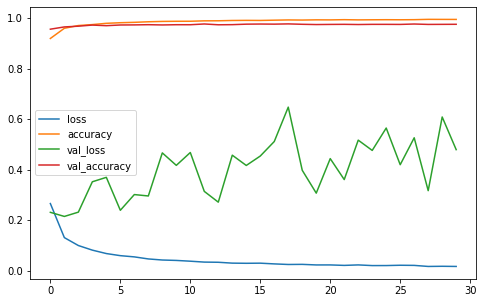

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [12]:
x_train = x_train/255.
x_test = x_test/255.

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2529 - accuracy: 0.9260 - val_loss: 0.1398 - val_accuracy: 0.9582
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1110 - accuracy: 0.9661 - val_loss: 0.1136 - val_accuracy: 0.9664
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0827 - accuracy: 0.9762 - val_loss: 0.1006 - val_accuracy: 0.9735
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9810 - val_loss: 0.1107 - val_accuracy: 0.9714
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9849 - val_loss: 0.1112 - val_accuracy: 0.9743
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0435 - accuracy: 0.9877 - val_loss: 0.1160 - val_accuracy: 0.9739
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0370 - accuracy: 0.9893 - val_loss: 0.1236 - val_accuracy:

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.9769


[0.2800414264202118, 0.9768999814987183]

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(128, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
________________________________________________

In [16]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3523 - accuracy: 0.8942 - val_loss: 0.1922 - val_accuracy: 0.9445
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2031 - accuracy: 0.9389 - val_loss: 0.1361 - val_accuracy: 0.9613
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1610 - accuracy: 0.9522 - val_loss: 0.1290 - val_accuracy: 0.9628
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1394 - accuracy: 0.9592 - val_loss: 0.1169 - val_accuracy: 0.9662
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1234 - accuracy: 0.9637 - val_loss: 0.1073 - val_accuracy: 0.9703
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1127 - accuracy: 0.9672 - val_loss: 0.1121 - val_accuracy: 0.9718
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1068 - accuracy: 0.9690 - val_loss: 0.1071 - val_accuracy:

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9812


[0.09489540755748749, 0.9811999797821045]